<a href="https://colab.research.google.com/github/AndreiMoraru123/Optimization/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch

You can intuitively think of the logistic regression as a linear regression used for classification problems, as this is what is esentially is. Instead of trying to fit a line for a group of data, now we are trying to draw a line that will separate two groups, hence the classification. The problem can thus only be binary, as it is not possible to separate three or more groups of data using a line.

The classification into one of the two categories is achieved using the sigmoid function to map the output between 0 and 1, numbers which effectively represent the probability of the output

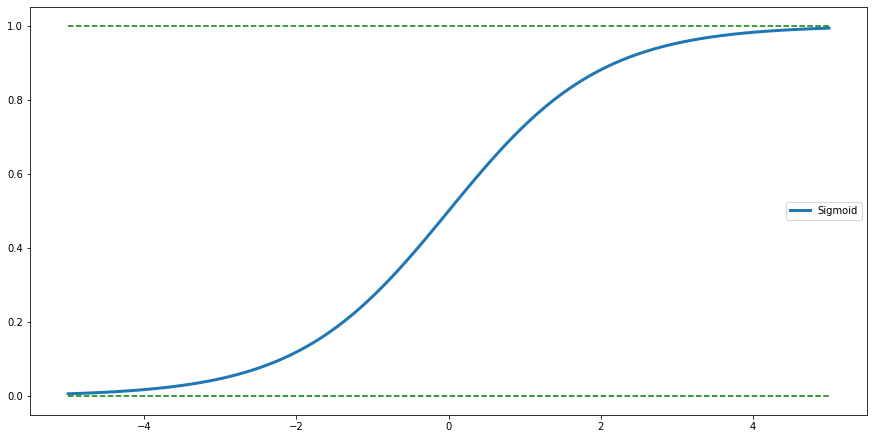

In [2]:
x = torch.linspace(-5,5,100)

plt.figure(figsize = (15,7.5))

plt.plot(x,torch.sigmoid(x),label = 'Sigmoid', linewidth = 3)
plt.plot(x[[0,-1]],[0,0],'--',color = 'green')
plt.plot(x[[0,-1]],[1,1],'--',color = 'green')
plt.legend()
plt.show()

Let's explore the same dummy dataset concept used previously for KNN

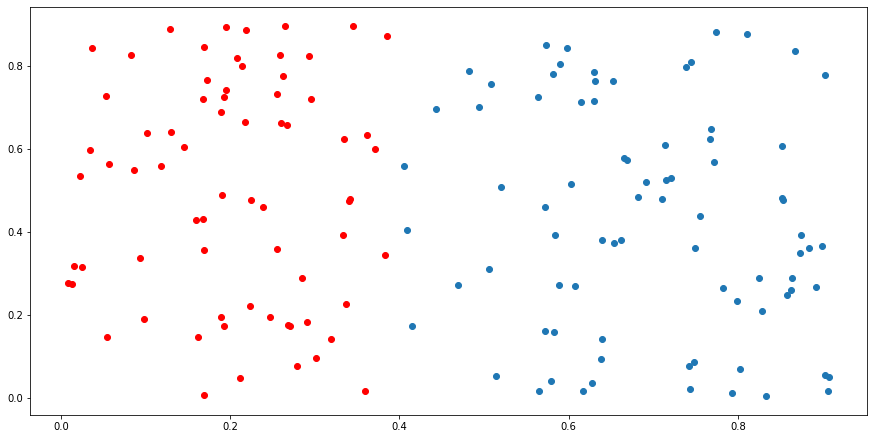

In [3]:
plt.figure(figsize = (15,7.5))

x = np.random.rand(150) * np.sin(2)
y = np.random.rand(150) * np.sin(2)

xl = x[x<0.4]
yl = y[x<0.4]
xr = x[x>0.4]
yr = y[x>0.4]

plt.scatter(xl,yl,color = 'r')
plt.scatter(xr,yr)
plt.show()

In [4]:
def sigmoid(X, w):
    eps = 1e-5
    s = np.dot(X, w) + eps
    return np.exp(s) / (1 + np.exp(s))

def loss(X, y, b):
    y_hat = sigmoid(X, b)
    cost = (-y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat)).mean()
    return cost

def update(X, y, w, alpha):
    y_hat = sigmoid(X, w)
    w = w + alpha * np.dot(X.T, y - y_hat)
    return w

def logistic_regression(X, y, alpha, epochs):
    w = np.zeros((X.shape[1], 1))
    train_loss= []

    for epoch in range(0, epochs):
        
        w = update(X, y, w, alpha)
        
        train_loss.append(loss(X, y, w))

    return w

In [5]:
dataset = []
x_data = []

for i in x:
  if i < 0.4:
    category = 0
  else:
    category = 1

  dataset.append([i.item(),y[x == i].item(),category])
  x_data.append([i.item(),y[x == i].item()])

In [6]:
y_data = []

for i in range(len(dataset)):
  y_data.append( dataset[i][-1] )

Process the data with Min-Max scaling

${\displaystyle \tilde x_i= {\frac {x_i - min(x)}{max(x) - min(x)} }}$

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mm_scaler = MinMaxScaler()
x_data = mm_scaler.fit_transform(x_data)
y_data = np.array(y_data)

Train the regression and compare the sigmoid output to the probability, which is .5 for two categories (think coin toss)

In [99]:
w = logistic_regression(x_data, y_data, 0.0001, 500)

y_pred =  sigmoid(x_data, w) > .5 * np.ones(y_data.shape[0]).reshape(y_data.shape) 

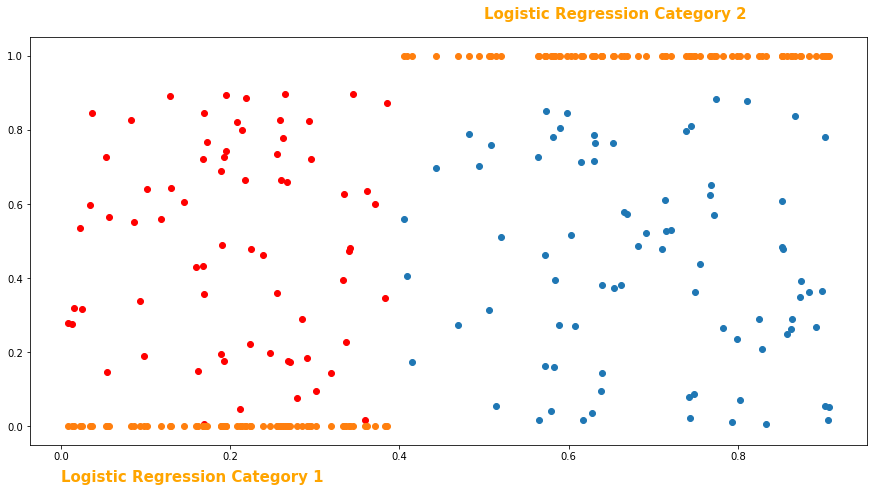

In [112]:
plt.figure(figsize = (15,7.5))
plt.scatter(xl,yl,color = 'r')
plt.scatter(xr,yr)
plt.scatter(x,y_pred[-1])
plt.text(0.5, 1.1, r'Logistic Regression Category 2', fontsize=15, color = 'orange',fontweight='bold')
plt.text(0, -0.15, r'Logistic Regression Category 1', fontsize=15, color = 'orange',fontweight='bold')
plt.show()